# Team info:

Project Title: Analysis of University Rankings in VA and Student Outcomes

Team name: Algorithm Avengers

Team member names and PIDs:
- Esther Kim - estherkdy
- Kaitlyn Green - kaitlyngreen
- Ben Clements - benc04 
- Hieu Ngo - hieu 
- Jackson Rowley - jacksonrowley04 



# Project introduction:
### Initial description of the project topic

Investigate relation between University Rankings and employment rates, income, salary growth, and average debt.


### Potential research questions you plan to address

What factors most significantly influence university rankings among Virginia universities?

Is there a correlation between university rankings and graduate employment rates in Virginia?

Is there a correlation between university rankings and starting salary?

Is there a correlation between university rankings and salary growth in the first few years?

How does school ranking correlate with job placement and salary trends in different industries?

What is the impact of new degrees on employment rates?

### Description of potential source data that would be relevant (including links or references if possible).

Best Colleges in Virginia and Categorial Rankings: https://www.usnews.com/best-colleges/va

List of Colleges & Universities in VA with school populations: 
https://en.wikipedia.org/wiki/List_of_colleges_and_universities_in_Virginia

Offers salary data based on employment reports, filtering by degree, and more possible: 
https://www.glassdoor.com/index.htm.

US Dept of Education, has tuition, mean salary, and graduation rate of universities: 
https://collegescorecard.ed.gov/school/?234076-University-of-Virginia-Main-Campus 





In [2]:
# imports
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

This code cell is reading an updated .csv file pulled from https://www.usnews.com/best-colleges/va?_sort=rank&_sortDirection=asc, which ranks universities and college in VA. The normal .csv, had unavailable data for in-state pricing for mostly private schools, as they do not techically have in-state rates, as well as two schools with no ranking. The 'not avaible' data for the private schools was copied over from out-of-state tuition to in-state for the respective schools, and the schools with no ranking were removed. The only public school with no pricing data pulled from US News was VMI, and the cells for tuiton were filled with tuition rates from their website for the 2024-2025 school year. This was also done for private schools with no data available for out-of-state and in-state tuition from US News. A VA Rank column was also added to the file as well.
- Esther Kim, retrieved, original csv file
- Kaitlyn Green, updated US_news_ranking_.csv, wrote this markdown cell

In [38]:
# df = pd.read_csv('US_news_ranking.csv')
df = pd.read_csv('US_news_ranking_UPDATED.csv') 

df

,Name,Location,National Rank,Category,Tuition (Out-of-State),Tuition (In-State),Undergraduate Enrollment,VA Rank
0,University of Virginia,Charlottesville VA,24,National Universities,60907,23118,17618,1
1,Virginia Tech,Blacksburg VA,51,National Universities,37158,15948,30504,2
2,William & Mary,Williamsburg VA,54,National Universities,50752,26019,6963,3
3,George Mason University,Fairfax VA,109,National Universities,38688,14220,27666,4
4,Virginia Commonwealth University,Richmond VA,136,National Universities,39194,16720,21205,5
5,James Madison University,Harrisonburg VA,148,National Universities,31264,13918,21008,6
6,Hampton University,Hampton VA,273,National Universities,30842,30842,3255,7
7,Marymount University,Arlington VA,288,National Universities,40120,40120,2216,8
8,Old Dominion University,Norfolk VA,296,National Universities,33780,12750,17736,9
9,Radford University,Radford VA,315,National Universities,25186,12548,5704,10


### Top 10 Universities in Virginia According to U.S. News Rankings

This chart highlights the top 10 universities in Virginia based on the U.S. News & World Report rankings. The rankings provide insights into the academic reputation, tuition costs, and undergraduate enrollment of each institution.
 - Esther Kim

In [19]:
df.head(11)

,Name,Location,National Rank,Category,Tuition (Out-of-State),Tuition (In-State),Undergraduate Enrollment,VA Rank
0,University of Virginia,Charlottesville VA,24,National Universities,60907,23118,17618,1
1,Virginia Tech,Blacksburg VA,51,National Universities,37158,15948,30504,2
2,William & Mary,Williamsburg VA,54,National Universities,50752,26019,6963,3
3,George Mason University,Fairfax VA,109,National Universities,38688,14220,27666,4
4,Virginia Commonwealth University,Richmond VA,136,National Universities,39194,16720,21205,5
5,James Madison University,Harrisonburg VA,148,National Universities,31264,13918,21008,6
6,Hampton University,Hampton VA,273,National Universities,30842,30842,3255,7
7,Marymount University,Arlington VA,288,National Universities,40120,40120,2216,8
8,Old Dominion University,Norfolk VA,296,National Universities,33780,12750,17736,9
9,Radford University,Radford VA,315,National Universities,25186,12548,5704,10


### Top 10 Virginia Universities by U.S. News Ranking: In-State vs. Out-of-State Tuition Comparison

This chart presents the top 10 universities in Virginia as ranked by U.S. News, showing a comparison of in-state and out-of-state tuition costs. Each university's tuition fees are shown side-by-side illustrating the difference in cost for resident versus non-resident students.
 - Esther Kim

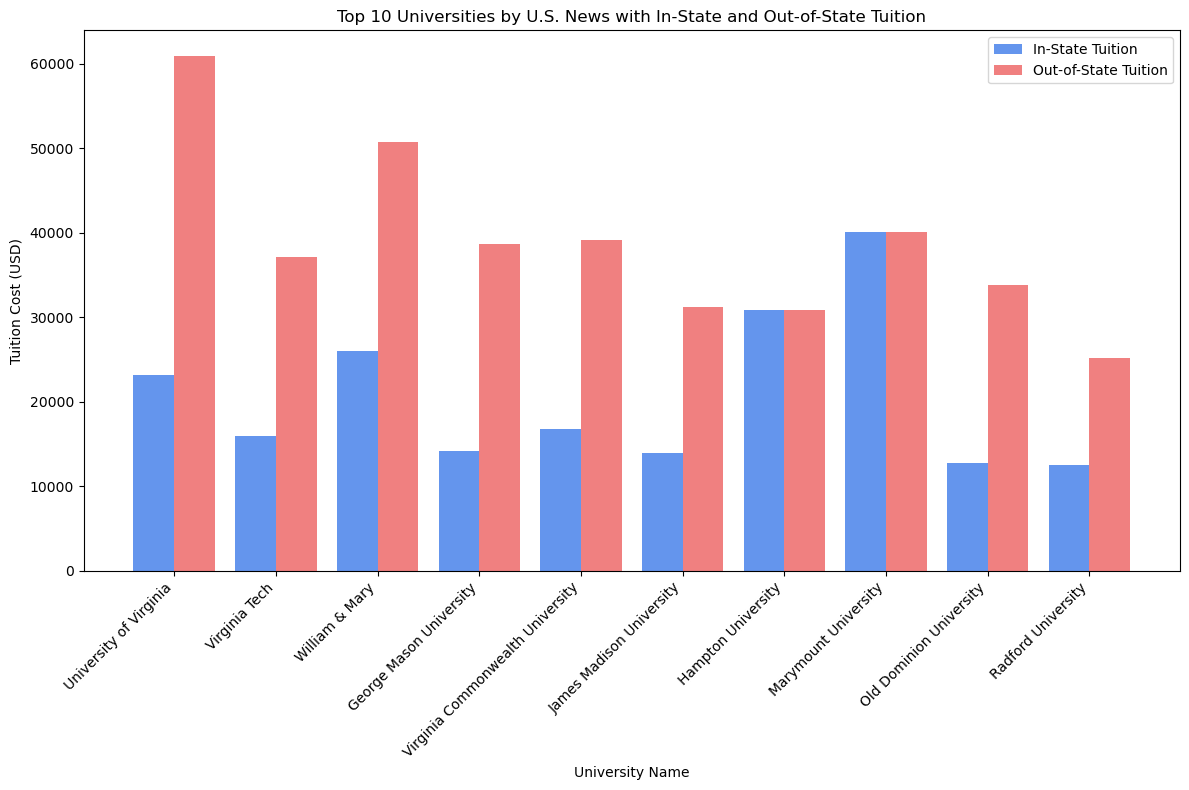

In [15]:
import matplotlib.pyplot as plt


# convert tuition col to numeric values, and handling non numeric with coerce 
df['Tuition (Out-of-State)'] = pd.to_numeric(df['Tuition (Out-of-State)'], errors='coerce')
df['Tuition (In-State)'] = pd.to_numeric(df['Tuition (In-State)'], errors='coerce')

 
top_10_universities = df.head(10)  

# plot
fig, ax = plt.subplots(figsize=(12, 8))
width = 0.4  # bar width 
indices = np.arange(len(top_10_universities))  

# plotting both in state and out of state tuition side by side
ax.bar(indices - width/2, top_10_universities['Tuition (In-State)'], width, label='In-State Tuition', color='cornflowerblue')
ax.bar(indices + width/2, top_10_universities['Tuition (Out-of-State)'], width, label='Out-of-State Tuition', color='lightcoral')

# x axis and y axis
ax.set_xlabel('University Name')
ax.set_ylabel('Tuition Cost (USD)')
ax.set_title('Top 10 Universities by U.S. News with In-State and Out-of-State Tuition')
ax.set_xticks(indices)
ax.set_xticklabels(top_10_universities['Name'], rotation=45, ha="right")
ax.legend()

plt.tight_layout()   
plt.show()

When tuition for in-state and out-of-state is the same, that indicates its a private university, as is the case for Hampton University and Marymount University. UVA and William & Mary have the two highest in-state tuitions, where the remaining public universities are 9,0000 dollars less or more than these two per school year in VA. However, UVA has the highest out-of-state tuiton, outpricing even the two private universities, at over 60,000 dollars a year.
- Esther Kim, produced visualization above
- Kaitlyn Green, wrote this cell

- Hieu Ngo, work starts here

### Is there a correlation between university rankings and future median salaries for students?
The work belows pulls data from institutions across the country, refines it to only schools in VA, and then merges this data with VA schools ranked by US News. The data is then displayed in linear regression graphs showing the correlation between national rankings of VA 

In [49]:
### Imprort data file
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
data = pd.read_csv('Most-Recent-Cohorts-Institution.csv')
data.head()

UNITID      OPEID   OPEID6                               INSTNM        CITY STABBR         ZIP                                       ACCREDAGENCY                             INSTURL                                             NPCURL  SCH_DEG  HCM2  MAIN  NUMBRANCH  PREDDEG  HIGHDEG  CONTROL  ST_FIPS  REGION  LOCALE  LOCALE2   LATITUDE  LONGITUDE  CCBASIC  CCUGPROF  CCSIZSET  HBCU  PBI  ANNHI  TRIBAL  AANAPII  HSI  NANTI  MENONLY  WOMENONLY  RELAFFIL  ADM_RATE  ADM_RATE_ALL  SATVR25  SATVR75  SATMT25  SATMT75  SATWR25  SATWR75  SATVRMID  SATMTMID  SATWRMID  ACTCM25  ACTCM75  ACTEN25  ACTEN75  ACTMT25  ACTMT75  ACTWR25  ACTWR75  ACTCMMID  ACTENMID  ACTMTMID  ACTWRMID  SAT_AVG  SAT_AVG_ALL  PCIP01  PCIP03  PCIP04  PCIP05  PCIP09  PCIP10  PCIP11  PCIP12  PCIP13  PCIP14  PCIP15  PCIP16  PCIP19  PCIP22  PCIP23  PCIP24  PCIP25  PCIP26  PCIP27  PCIP29  PCIP30  PCIP31  PCIP38  PCIP39  PCIP40  PCIP41  PCIP42  PCIP43  PCIP44  PCIP45  PCIP46  PCIP47  PCIP48  PCIP49  PCIP50  PCIP51  PCIP52  \
0  100654   100200.0   1002.0             Alabama A & M University      Normal     AL       35762  Southern Association of Colleges and Schools C...                       www.aamu.edu/  www.aamu.edu/admissions-aid/tuition-fees/net-p...      3.0     0     1          1        3        4        1        1       5    12.0      NaN  34.783368 -86.568502     18.0      10.0      14.0   1.0  0.0    0.0     0.0      0.0  0.0    0.0      0.0        0.0       NaN    0.6840      0.683956    430.0    523.0    400.0    510.0    370.0    457.0     475.0     460.0     414.0     15.0     19.0     13.0     20.0     15.0     18.0      NaN      NaN      18.0      17.0      17.0       NaN    920.0        920.0  0.0333  0.0157  0.0059  0.0000  0.0000  0.0333  0.0802     0.0  0.0391  0.1076  0.0157  0.0000  0.0235     0.0  0.0117  0.0176     0.0  0.1644  0.0020     0.0  0.0000  0.0333  0.0000  0.0000  0.0117  0.0000  0.0744  0.0900  0.0431  0.0313     0.0     0.0     0.0     0.0  0.0137  0.0000  0.1526   
1  100663   105200.0   1052.0  University of Alabama at Birmingham  Birmingham     AL  35294-0110  Southern Association of Colleges and Schools C...                https://www.uab.edu/  https://tcc.ruffalonl.com/University of Alabam...      3.0     0     1          1        3        4        1        1       5    12.0      NaN  33.505697 -86.799345     15.0       9.0      15.0   0.0  0.0    0.0     0.0      0.0  0.0    0.0      0.0        0.0       NaN    0.8668      0.866794    610.0    690.0    590.0    720.0      NaN      NaN     637.0     644.0       NaN     23.0     30.0     22.0     33.0     20.0     28.0      NaN      NaN      27.0      28.0      25.0       NaN   1291.0       1291.0  0.0000  0.0000  0.0000  0.0007  0.0269  0.0000  0.0241     0.0  0.0670  0.0600  0.0000  0.0073  0.0000     0.0  0.0157  0.0328     0.0  0.1250  0.0063     0.0  0.0000  0.0000  0.0052  0.0000  0.0227  0.0003  0.0792  0.0353  0.0175  0.0265     0.0     0.0     0.0     0.0  0.0248  0.2213  0.1934   
2  100690  2503400.0  25034.0                   Amridge University  Montgomery     AL  36117-3553  Southern Association of Colleges and Schools C...  https://www.amridgeuniversity.edu/           https://www2.amridgeuniversity.edu:9091/      3.0     0     1          1        3        4        2        1       5    12.0      NaN  32.362609 -86.174010     20.0       5.0       6.0   0.0  0.0    0.0     0.0      0.0  0.0    0.0      0.0        0.0      74.0       NaN           NaN      NaN      NaN      NaN      NaN      NaN      NaN       NaN       NaN       NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN       NaN       NaN       NaN       NaN      NaN          NaN  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000     0.0  0.0000  0.0000  0.0000  0.0000  0.2065     0.0  0.0000  0.0109     0.0  0.0000  0.0000     0.0  0.0000  0.0000  0.0000  0.2283  0.0000  0.0000  0.0000  0.0978  0.0000  0.0000     0.0     0.0     0.0     0.0  0.0000  0.0000  0.4565   
3  100706  

In [51]:
df = pd.DataFrame(data)
VA_df = df[df['STABBR']=='VA']

In [53]:
### Creating data frame for Virginia Universities, sorting form highest to lowest median earning
### The dataframe includes Mediean_Earn_6: reflecting early career success 6 years after enrollment
### Median_Earn_8, Median_Earn_10: providing insights into more established earnings potential and career growth after 8 years and 10 years
new_df = pd.DataFrame({
    'Institution':VA_df['INSTNM'], 'City': VA_df['CITY'], 'State': VA_df['STABBR'], 'Median_Earn_6': VA_df['MD_EARN_WNE_P6'],
    'Median_Earn_8': VA_df['MD_EARN_WNE_P8'], 'Median_Earn_10': VA_df['MD_EARN_WNE_P10']
})
new_df.dropna()
sorted_df = new_df.sort_values(by='Median_Earn_6', ascending=False)
sorted_df.dropna()

,Institution,City,State,Median_Earn_6,Median_Earn_8,Median_Earn_10
4986,Chamberlain University-Virginia,Vienna,VA,84533.0,88361.0,92405.0
3343,Sentara College of Health Sciences,Chesapeake,VA,78992.0,78797.0,77821.0
3387,Washington and Lee University,Lexington,VA,76516.0,89772.0,94810.0
3359,Bon Secours Memorial College of Nursing,Richmond,VA,75150.0,72735.0,77014.0
3380,University of Virginia-Main Campus,Charlottesville,VA,72359.0,80156.0,86863.0
...,...,...,...,...,...,...
5129,Empire Beauty School-Virginia Beach,Virginia Beach,VA,20172.0,22421.0,24407.0
5955,Aveda Arts & Sciences Institute Lafayette-Arli...,Arlington,VA,19975.0,21877.0,23904.0
3353,Sylvain Melloul International Hair Academy,Lynchburg,VA,17502.0,19574.0,17106.0
3382,Asher Institute of Hampton,Hampton,VA,17178.0,18866.0,18710.0


In [57]:
df = pd.read_csv('US_news_ranking_UPDATED.csv') 
df.fillna('Not Available', inplace=True)
df.head(11)

,Name,Location,National Rank,Category,Tuition (Out-of-State),Tuition (In-State),Undergraduate Enrollment,VA Rank
0,University of Virginia,Charlottesville VA,24,National Universities,60907,23118,17618,1
1,Virginia Tech,Blacksburg VA,51,National Universities,37158,15948,30504,2
2,William & Mary,Williamsburg VA,54,National Universities,50752,26019,6963,3
3,George Mason University,Fairfax VA,109,National Universities,38688,14220,27666,4
4,Virginia Commonwealth University,Richmond VA,136,National Universities,39194,16720,21205,5
5,James Madison University,Harrisonburg VA,148,National Universities,31264,13918,21008,6
6,Hampton University,Hampton VA,273,National Universities,30842,30842,3255,7
7,Marymount University,Arlington VA,288,National Universities,40120,40120,2216,8
8,Old Dominion University,Norfolk VA,296,National Universities,33780,12750,17736,9
9,Radford University,Radford VA,315,National Universities,25186,12548,5704,10


In [59]:
### Merge university ranking dataframe and income dataframe to find the relation between them
merge_df = pd.merge(sorted_df,df,
                         left_on=['Institution'],
                         right_on=['Name'],
                         how='inner'
                        )
merge_df.head(38)
df['MaxRank'] = merge_df['National Rank'].apply(lambda x: max(map(int, x.split('-'))))
data = {
    'Name': merge_df["Name"],
    'Location': merge_df["Location"],
   'National Rank': df['MaxRank'],  
    'Median_Earn_6': merge_df["Median_Earn_6"],
    'Median_Earn_8': merge_df["Median_Earn_8"],
    'Median_Earn_10': merge_df["Median_Earn_10"]
    
}
rank_earn_df = pd.DataFrame(data)
clean_df = rank_earn_df.dropna()
clean_df


,Name,Location,National Rank,Median_Earn_6,Median_Earn_8,Median_Earn_10
0,Washington and Lee University,Lexington VA,19.0,76516.0,89772.0,94810.0
1,University of Richmond,Univ. of Richmond VA,22.0,67927.0,73948.0,76178.0
2,Virginia Military Institute,Lexington VA,59.0,63545.0,78129.0,77369.0
3,William & Mary,Williamsburg VA,54.0,62959.0,67721.0,73490.0
4,George Mason University,Fairfax VA,109.0,60536.0,68053.0,76343.0
5,Marymount University,Arlington VA,288.0,57801.0,63019.0,67516.0
6,James Madison University,Harrisonburg VA,148.0,57438.0,64070.0,69954.0
7,Hampden-Sydney College,Hampden-Sydney VA,103.0,55846.0,63236.0,67640.0
8,Christopher Newport University,Newport News VA,6.0,51931.0,57119.0,60509.0
9,University of Mary Washington,Fredericksburg VA,132.0,49411.0,54986.0,60613.0


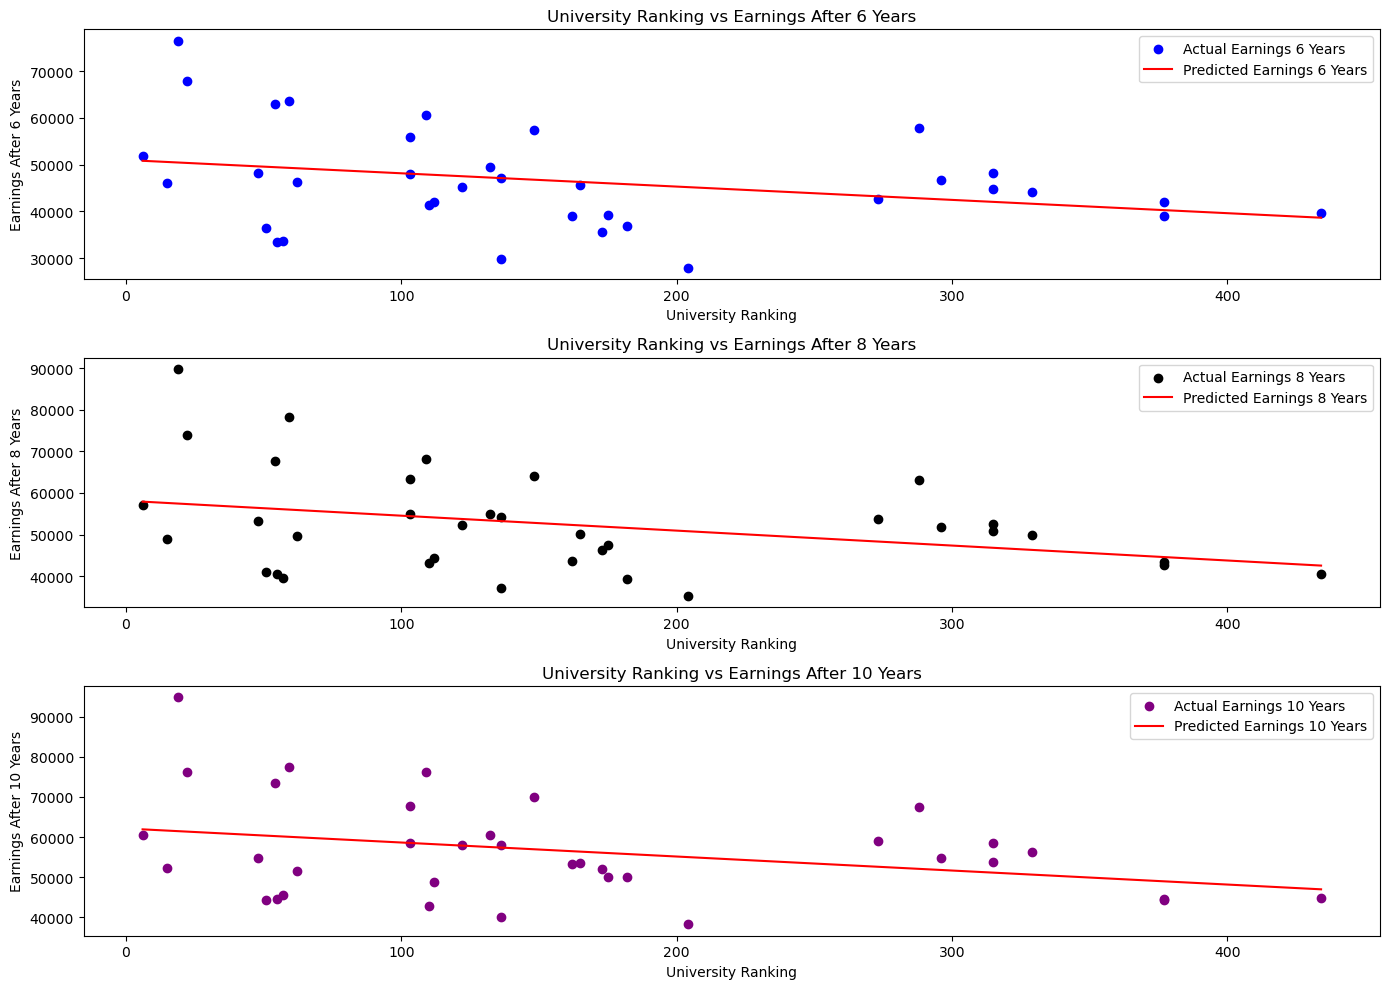

In [61]:
###Performing multiple linear regression between university ranking and median earning to understand the relation ship between them
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

X = clean_df[['National Rank']]
Y = clean_df[['Median_Earn_6', 'Median_Earn_8', 'Median_Earn_10']]

# Initialize and fit models
model6 = LinearRegression().fit(X, Y['Median_Earn_6'])
model8 = LinearRegression().fit(X, Y['Median_Earn_8'])
model10 = LinearRegression().fit(X, Y['Median_Earn_10'])
# Predict values and compute residuals
Y_pred6 = model6.predict(X)
residuals6 = Y['Median_Earn_6'] - Y_pred6

Y_pred8 = model8.predict(X)
residuals8 = Y['Median_Earn_8'] - Y_pred8

Y_pred10 = model10.predict(X)
residuals10 = Y['Median_Earn_10'] - Y_pred10
# Predict values
X_pred = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
Y_pred6 = model6.predict(X_pred)
Y_pred8 = model8.predict(X_pred)
Y_pred10 = model10.predict(X_pred)

# Create scatter plots
plt.figure(figsize=(14, 10))

plt.subplot(3, 1, 1)
plt.scatter(X, Y['Median_Earn_6'], color='blue', label='Actual Earnings 6 Years')
plt.plot(X_pred, Y_pred6, color='red', label='Predicted Earnings 6 Years')
plt.title('University Ranking vs Earnings After 6 Years')
plt.xlabel('University Ranking')
plt.ylabel('Earnings After 6 Years')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X, Y['Median_Earn_8'], color='black', label='Actual Earnings 8 Years')
plt.plot(X_pred, Y_pred8, color='red', label='Predicted Earnings 8 Years')
plt.title('University Ranking vs Earnings After 8 Years')
plt.xlabel('University Ranking')
plt.ylabel('Earnings After 8 Years')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X, Y['Median_Earn_10'], color='purple', label='Actual Earnings 10 Years')
plt.plot(X_pred, Y_pred10, color='red', label='Predicted Earnings 10 Years')
plt.title('University Ranking vs Earnings After 10 Years')
plt.xlabel('University Ranking')
plt.ylabel('Earnings After 10 Years')
plt.legend()

plt.tight_layout()
plt.show()

- Hieu Ngo, work ends here

According to the linear regression plots when comparing national university rankings to to median earnings, after 6, 8, and 10 years, there is a negative correlation. So the lower or rather technically higher 'ranking' a university has, the lower the future median earnings of its students. A school that is rank 1 would have students with higher future median earnings than one at a rank 300 would.
- Kaitlyn Green

Jackson Rowley work start 

### National Rank vs Tuition for public and private Universities

Does the ranking of a college effect its tuition, and how does tha change with if that University is public or private? The data used comes from US news rankings and This work show the relationship between National rank and tuition, as well as how that changes based on if that university is public or private.

In [3]:
uni_rank = pd.read_csv('US_news_ranking_UPDATED.csv') 

In [4]:
#creates column based on public vs private school
uni_rank['Class'] = ['Private' if uni_rank['Tuition (In-State)'][i] == uni_rank['Tuition (Out-of-State)'][i] else 'Public' for i in range(0, len(uni_rank))]

#computes tuition for each university
uni_rank['Avg_Tuition'] = (uni_rank['Tuition (In-State)'] + uni_rank['Tuition (Out-of-State)'])/2
uni_rank['National'] = uni_rank['National Rank']

#rank given in range -> mean of that range
uni_rank['National'][39] = (434+392)/2
uni_rank['National'][40] = (187+204)/2
#Makes national a float
uni_rank.National = uni_rank.National.map(lambda t: float(t))


C:\Users\JRschool\AppData\Local\Temp\ipykernel_26892\3182659353.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uni_rank['National'][39] = (434+392)/2
C:\Users\JRschool\AppData\Local\Temp\ipykernel_26892\3182659353.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uni_rank['National'][40] = (187+204)/2


In [5]:
#sorts values based on national ranking 
uni_rank = uni_rank.sort_values('National')

In [6]:
# colors for plot
colors = ['red' if uni_rank['Tuition (In-State)'][i] == uni_rank['Tuition (Out-of-State)'][i] else 'blue' for i in range(0, len(uni_rank))]

In [7]:
#Linear regression between Average tuition cost and rank for public schools
from sklearn.linear_model import LinearRegression

#dataframe for only public universities
pub_df = uni_rank[uni_rank.Class == 'Public']

Pub_X = pub_df[['National']]
Pub_Y = pub_df.Avg_Tuition

#fit model
pub_model = LinearRegression().fit(Pub_X, Pub_Y)

#creates column in dataframe
pub_df['Pred_pub'] = pub_model.predict(Pub_X)


C:\Users\JRschool\AppData\Local\Temp\ipykernel_26892\3713240721.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pub_df['Pred_pub'] = pub_model.predict(Pub_X)


In [8]:
#Linear regression between Average tuition cost and rank for public schools

#creates dataframe of private universities
priv_df = uni_rank[uni_rank.Class == 'Private']


Priv_X = priv_df[['National']]
Priv_Y = priv_df.Avg_Tuition

#fit model
priv_model = LinearRegression().fit(Priv_X, Priv_Y)

#create column in dataframe
priv_df['Pred_priv'] = priv_model.predict(Priv_X)


C:\Users\JRschool\AppData\Local\Temp\ipykernel_26892\3249945223.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  priv_df['Pred_priv'] = priv_model.predict(Priv_X)


<AxesSubplot:title={'center':'Tuition vs National Ranking for Public and Private Schools'}, xlabel='National', ylabel='Average Tuition'>

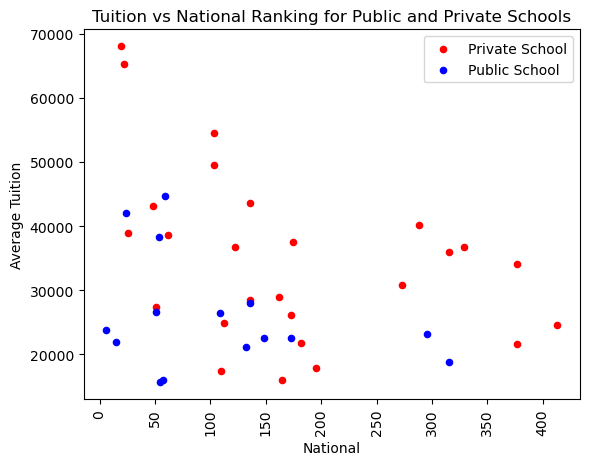

In [9]:
#Public vs Private school scatter Plot
axes = uni_rank[uni_rank.Class == 'Private'].plot.scatter(x = 'National', y = 'Avg_Tuition', color = 'red', label = 'Private School')
uni_rank[uni_rank.Class == 'Public'].plot.scatter(x = 'National', y = 'Avg_Tuition', color = 'blue', ax = axes, label = 'Public School',
                                                  rot = 90, title = 'Tuition vs National Ranking for Public and Private Schools',
                                                 ylabel = 'Average Tuition')

<AxesSubplot:title={'center':'Linear Regression Public vs Private'}, xlabel='National', ylabel='Average Tuition'>

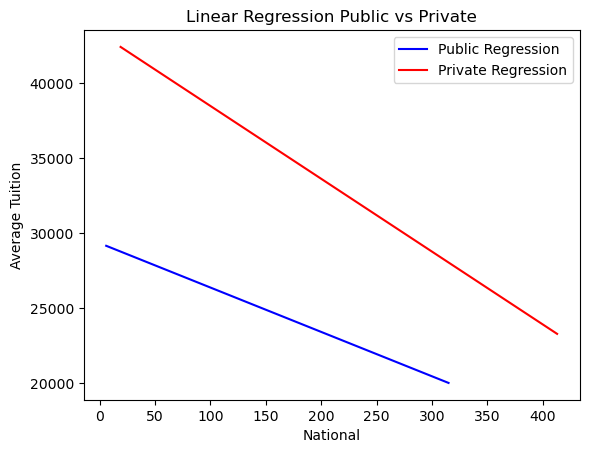

In [10]:
#Regression plots
ax3 = pub_df.plot(x = 'National', y = 'Pred_pub', color = 'blue', label = 'Public Regression')
priv_df.plot(x = 'National', y = 'Pred_priv', color = 'red', ax = ax3, label = 'Private Regression',
             ylabel = 'Average Tuition', title = "Linear Regression Public vs Private")

From this analysis we are able to conclude that based on the average tuition of public and private universities in virginia that public universities are on average going to cost significantly less to recieve a similar national ranking to that if a private university. As well as, this shows that as tuition cost rises in both public and private universities the ranking of that university improves.

End Jackson work